In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import random
import warnings

warnings.filterwarnings(action='ignore')

In [10]:
train_data = pd.read_csv('/content/train_edit.csv')
test_data = pd.read_csv('/content/test_edit.csv')

In [11]:
# Drop unused column
train_data.drop('Unnamed: 0', axis=1, inplace=True)
test_data.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
train_data.head()

,Diagnosis,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
0,1,Male,Asian,Stable,No,5.776834,7.945197,6.538275,5.821416,5.589637,5.990781,5.843773,3.682413,3.544660,1.396333,4.292102,5.820395,6.763654,1.165049,8.730176
1,0,Male,Hispanic,Stable,No,7.298161,8.605159,5.386226,6.657438,6.115384,4.740278,6.033697,5.381531,2.077573,2.520095,2.950640,4.904143,3.009537,1.635291,4.675389
2,1,Female,Black,Unstable,No,5.478631,6.581001,7.314665,5.759076,4.096647,4.004291,7.184592,5.588698,3.076944,1.552275,5.364331,5.332242,6.689860,3.030685,0.750534
3,0,Female,Black,Stable,Yes,7.440324,6.482757,7.519543,5.483178,5.532212,7.980671,6.172174,6.222733,3.657648,2.413774,3.739074,3.874793,6.749632,1.548987,4.812903
4,1,Male,White,Stable,Yes,7.655051,6.159573,7.658879,5.310127,5.067152,3.445936,8.724369,4.631259,3.452163,4.862946,3.967482,3.537156,6.034795,3.502844,8.012474


In [13]:
train_data['Sex'] = train_data['Sex'].map({'Male' : 0, 'Female' : 1})
train_data['Race'] = train_data['Race'].map({'Asian' : 0, 'Hispanic' : 1, 'Black' : 2, 'White' : 3})
train_data['Housing'] = train_data['Housing'].map({'Unstable' : 0, 'Stable' : 1})
train_data['Delay'] = train_data['Delay'].map({'No' : 0, 'Yes' : 1})

test_data['Sex'] = test_data['Sex'].map({'Male' : 0, 'Female' : 1})
test_data['Race'] = test_data['Race'].map({'Asian' : 0, 'Hispanic' : 1, 'Black' : 2, 'White' : 3})
test_data['Housing'] = test_data['Housing'].map({'Unstable' : 0, 'Stable' : 1})
test_data['Delay'] = test_data['Delay'].map({'No' : 0, 'Yes' : 1})

In [14]:
train_data['Is_Black'] = train_data['Race']
test_data['Is_Black'] = test_data['Race']

black = [2]
non_black = [0, 1, 3]

for each in black:
    train_data['Is_Black'] = train_data['Is_Black'].replace(each, '1')
    test_data['Is_Black'] = test_data['Is_Black'].replace(each, '1')

for each in non_black:
    train_data['Is_Black'] = train_data['Is_Black'].replace(each, '0')
    test_data['Is_Black'] = test_data['Is_Black'].replace(each, '0')

In [15]:
train_data.drop(columns = ['Race'], inplace = True)
train_data.drop(columns = ['Sleep'], inplace = True)
train_data.drop(columns = ['Appetite'], inplace = True)
train_data.drop(columns = ['Passive'], inplace = True)

test_data.drop(columns = ['Race'], inplace = True)
test_data.drop(columns = ['Sleep'], inplace = True)
test_data.drop(columns = ['Appetite'], inplace = True)
test_data.drop(columns = ['Passive'], inplace = True)

In [16]:
train_data['Psych_Stress'] = (train_data['Delusion'] + train_data['UnusualThought'] -  train_data['Rumination'])
train_data['Psych_Stress'] = train_data['Psych_Stress'].round(1)

test_data['Psych_Stress'] = (test_data['Delusion'] + test_data['UnusualThought'] -  test_data['Rumination'])
test_data['Psych_Stress'] = test_data['Psych_Stress'].round(1)

In [17]:
train_data.head()

,Diagnosis,Sex,Housing,Delay,Anhedonia,DepMood,Tired,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Tension,UnusualThought,Income,Is_Black,Psych_Stress
0,1,0,1,0,5.776834,7.945197,5.821416,5.990781,5.843773,3.682413,3.544660,1.396333,4.292102,6.763654,1.165049,8.730176,0,-1.3
1,0,0,1,0,7.298161,8.605159,6.657438,4.740278,6.033697,5.381531,2.077573,2.520095,2.950640,3.009537,1.635291,4.675389,0,-1.0
2,1,1,0,0,5.478631,6.581001,5.759076,4.004291,7.184592,5.588698,3.076944,1.552275,5.364331,6.689860,3.030685,0.750534,1,2.1
3,0,1,1,1,7.440324,6.482757,5.483178,7.980671,6.172174,6.222733,3.657648,2.413774,3.739074,6.749632,1.548987,4.812903,1,-2.8
4,1,0,1,1,7.655051,6.159573,5.310127,3.445936,8.724369,4.631259,3.452163,4.862946,3.967482,6.034795,3.502844,8.012474,0,3.5


In [18]:
test_data.head()

,Diagnosis,Sex,Housing,Delay,Anhedonia,DepMood,Tired,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Tension,UnusualThought,Income,Is_Black,Psych_Stress
0,1,0,1,1,6.532957,6.662940,5.082433,2.933780,7.142030,4.734500,2.773761,3.559530,5.486171,6.603999,1.194969,5.759510,0,1.0
1,1,1,1,0,4.696685,8.437778,4.711261,5.551996,7.102520,3.822138,2.001125,3.027988,1.383793,6.080530,2.287655,8.618187,0,-1.3
2,0,1,1,1,8.782816,7.908974,4.356265,7.061972,7.497020,4.967228,1.925978,1.103069,4.424148,6.053067,1.163207,5.443189,1,-4.0
3,1,0,1,1,5.511104,5.899826,2.366412,3.576740,5.655202,6.674195,4.342724,3.159770,5.193405,6.499117,3.798262,6.868004,0,4.6
4,0,1,1,1,7.589003,9.643284,5.501671,9.205154,5.149195,3.996624,1.746914,1.737649,4.737726,4.190474,2.840198,3.862500,0,-4.6


Isolation Forest를 활용한 이상치 확인

In [19]:
# Combine train_data and test_data
data = pd.concat([train_data, test_data], axis=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       11000 non-null  int64  
 1   Sex             11000 non-null  int64  
 2   Housing         11000 non-null  int64  
 3   Delay           11000 non-null  int64  
 4   Anhedonia       11000 non-null  float64
 5   DepMood         11000 non-null  float64
 6   Tired           11000 non-null  float64
 7   Rumination      11000 non-null  float64
 8   Concentration   11000 non-null  float64
 9   Psychomotor     11000 non-null  float64
 10  Delusion        11000 non-null  float64
 11  Suspicious      11000 non-null  float64
 12  Withdrawal      11000 non-null  float64
 13  Tension         11000 non-null  float64
 14  UnusualThought  11000 non-null  float64
 15  Income          11000 non-null  float64
 16  Is_Black        11000 non-null  object 
 17  Psych_Stress    11000 non-null  f

In [20]:
# Use isolation forest method to find outliers
clf = IsolationForest(random_state=42)
pred = clf.fit_predict(data)
data_nonoutlier = data[pred == 1]   # 1: not outlier
data_outlier = data[pred != 1]      # -1:outlier
print('Number of nonoutliers:', len(data_nonoutlier))
print('Number of outliers:', len(data_outlier))

Number of nonoutliers: 8290
Number of outliers: 2710


PCA를 활용한 이상치 분포 시각화

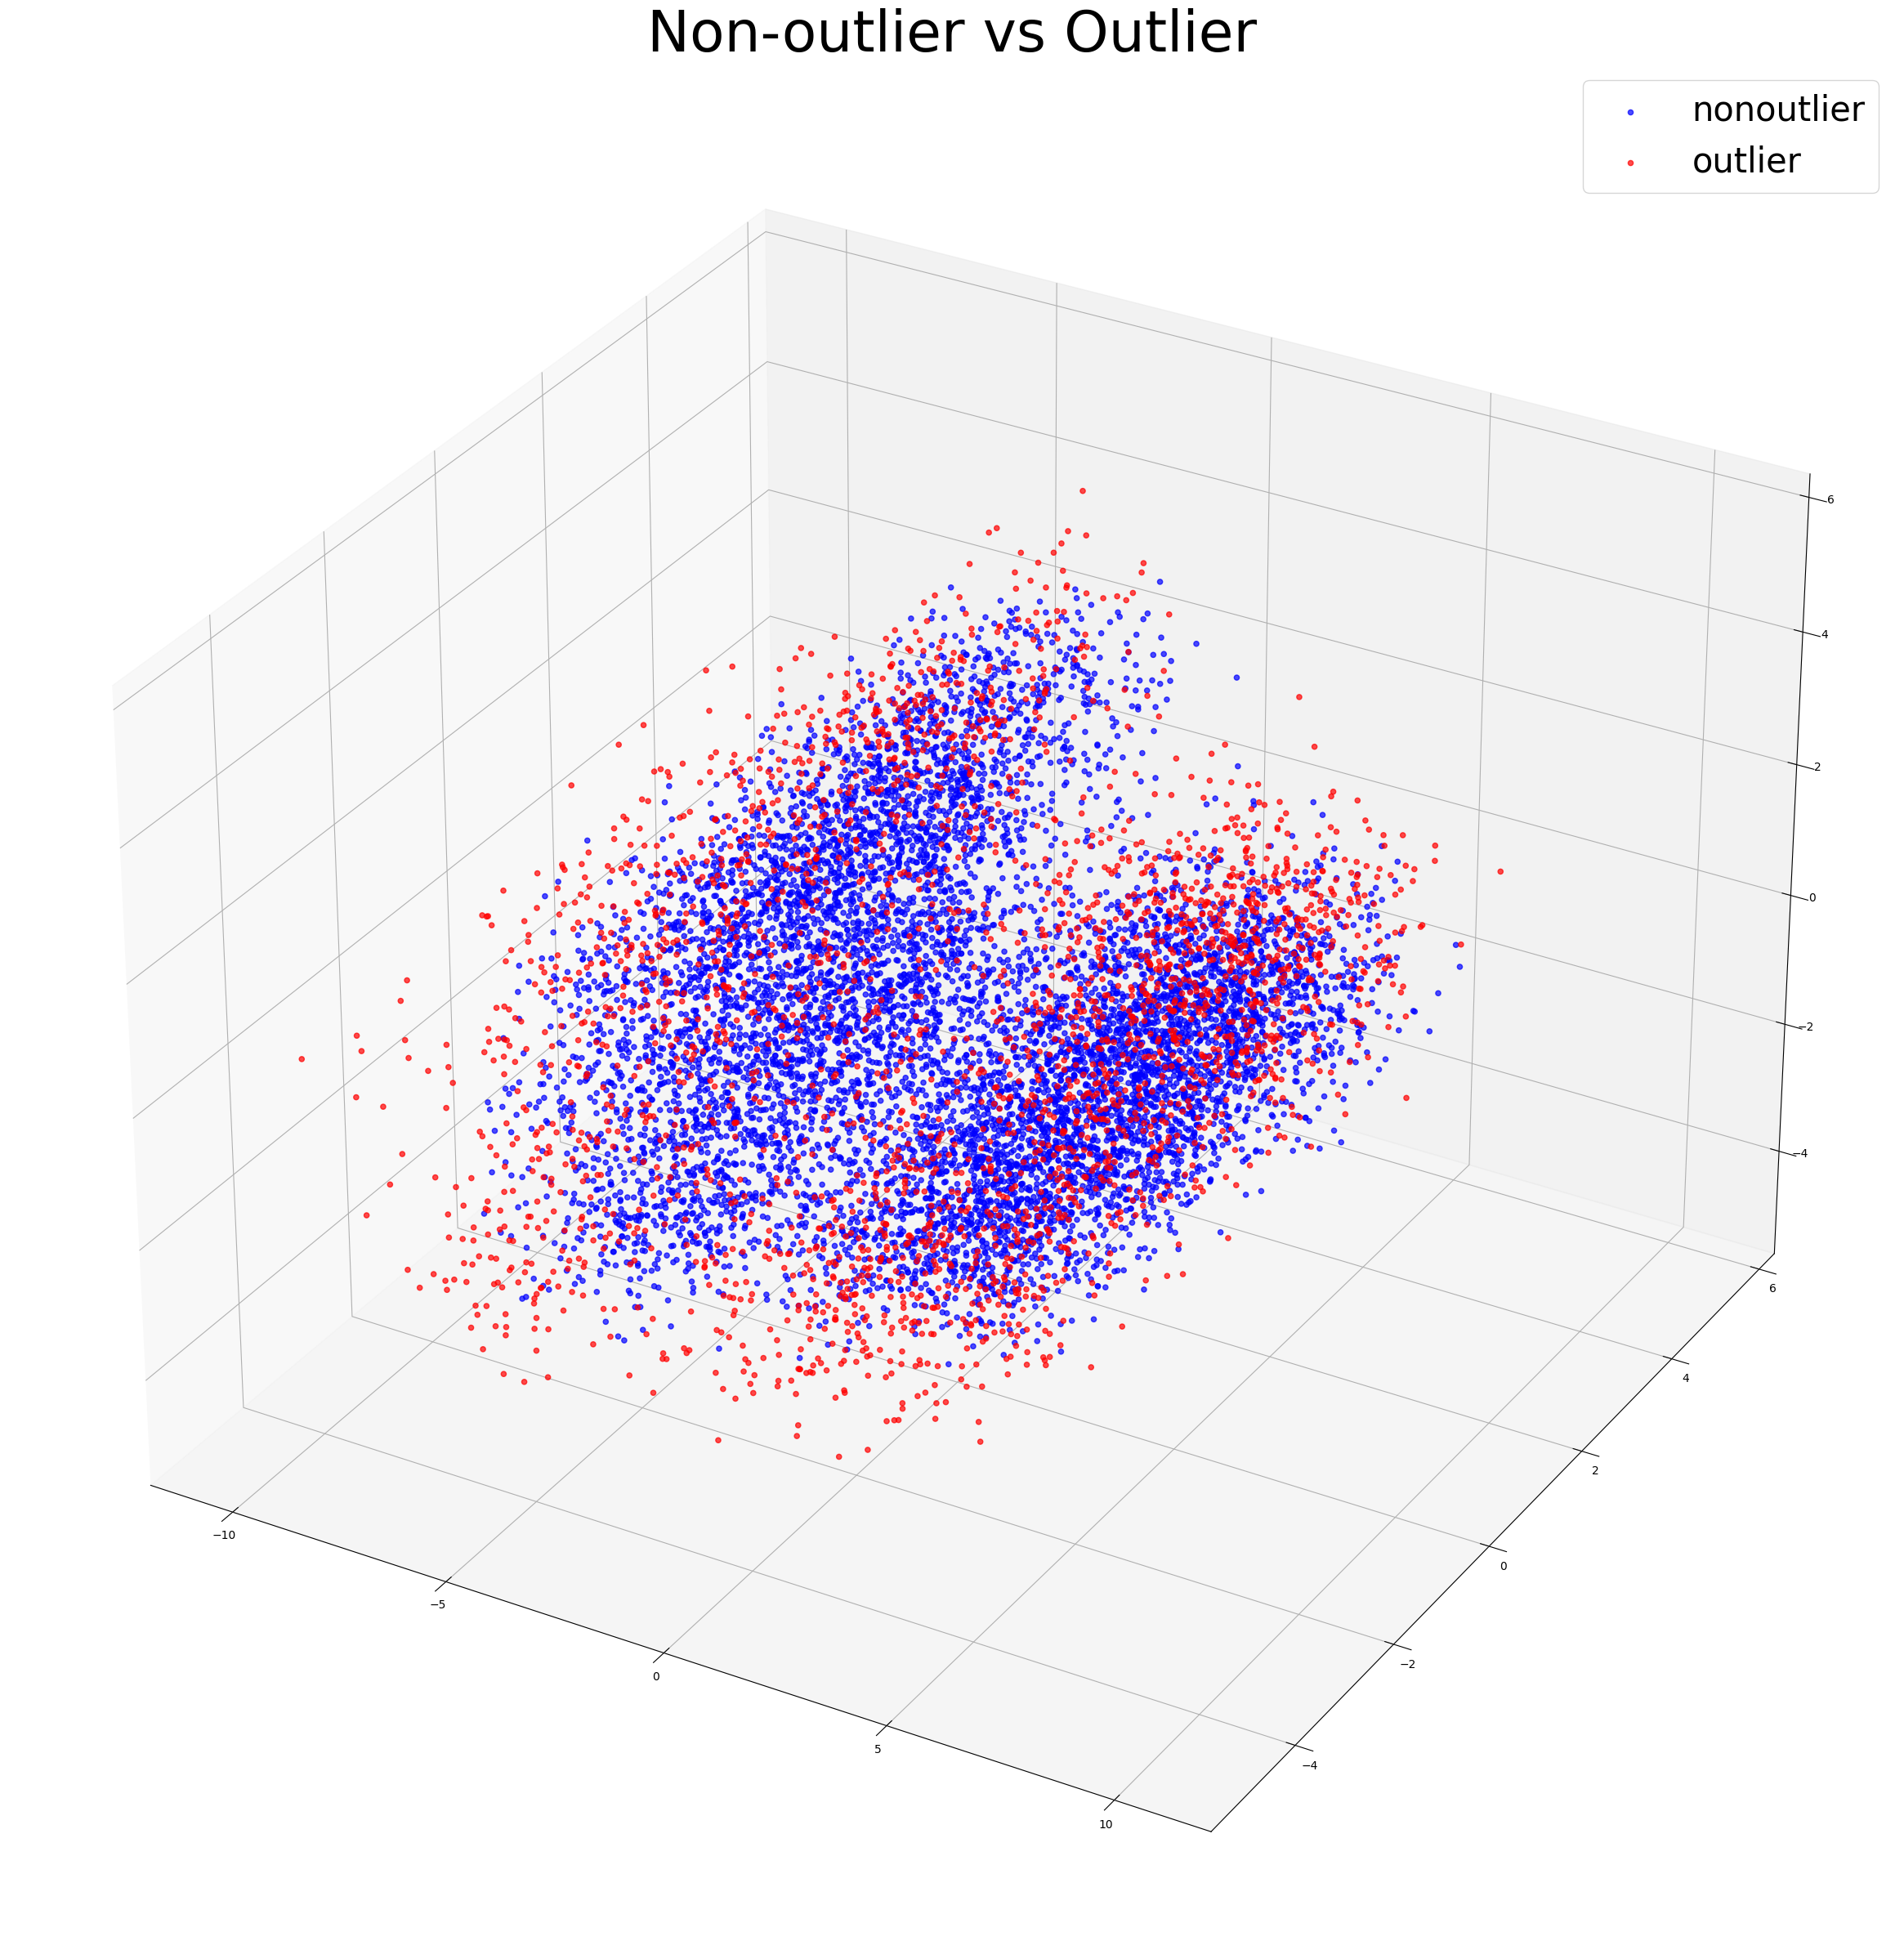

In [22]:
# Use PCA method to reduce dimension of data into 3
pca = PCA(n_components = 3)
pca_nonoutlier = pca.fit_transform(data_nonoutlier)
pca_outlier = pca.fit_transform(data_outlier)

# Transform into dataframe
pca_nonoutlier = pd.DataFrame(pca_nonoutlier, columns=['component 0', 'component 1', 'component 2'])
pca_outlier = pd.DataFrame(pca_outlier, columns=['component 0', 'component 1', 'component 2'])

# Visualize the 3-dimensional data
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_nonoutlier['component 0'], pca_nonoutlier['component 1'], pca_nonoutlier['component 2'], color='blue', alpha=0.7, label='nonoutlier')
ax.scatter(pca_outlier['component 0'], pca_outlier['component 1'], pca_outlier['component 2'], color='red', alpha=0.7, label='outlier')
ax.legend(fontsize=30)
plt.title('Non-outlier vs Outlier', fontsize=50)
plt.show()